<a href="https://colab.research.google.com/github/murali-marimekala/digital_recognizer/blob/main/notebooks/digital_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Step 2: Split train data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# Step 3: Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Step 5: Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5340 - loss: 1.4227 - val_accuracy: 0.8362 - val_loss: 0.5403
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8521 - loss: 0.4962 - val_accuracy: 0.8836 - val_loss: 0.3942
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8888 - loss: 0.3798 - val_accuracy: 0.9044 - val_loss: 0.3407
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9074 - loss: 0.3202 - val_accuracy: 0.9124 - val_loss: 0.2992
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9146 - loss: 0.2880 - val_accuracy: 0.9226 - val_loss: 0.2699
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9236 - loss: 0.2618 - val_accuracy: 0.9282 - val_loss: 0.2470
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9300 - loss: 0.2416 - val_accuracy: 0.9296 - val_loss: 0.2389
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9358 - loss: 0.2212

In [14]:
# Step 7: Save the model
model.save("digit_recognizer_model.keras")

In [16]:
# Step 8: Example for inference
def predict_digit(image):
    image = np.array(image) / 255.0  # Normalize image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)
    return predicted_label

In [17]:
# Load a sample digit from the test set
sample_index = 0
sample_image = X_test[sample_index]
sample_label = np.argmax(y_test[sample_index])

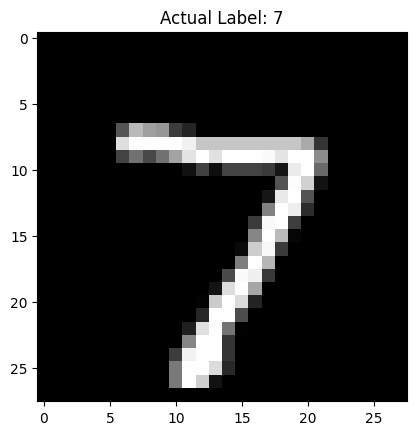

In [18]:
# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}")
plt.show()


In [19]:
# Predict using the model
predicted_label = predict_digit(sample_image)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Label: 7


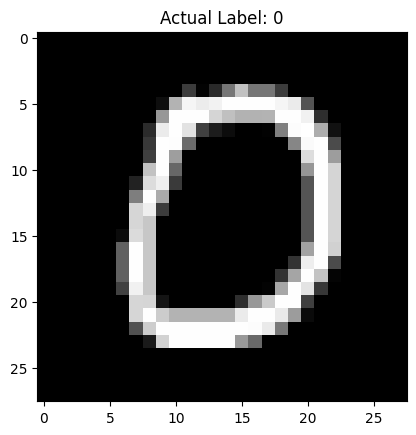

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label: 7



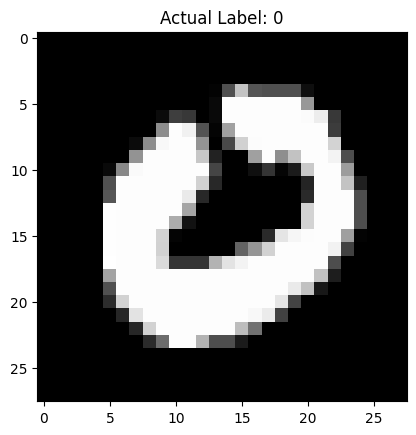

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label: 7



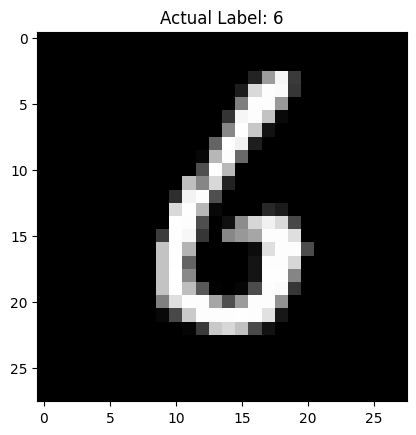

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label: 7



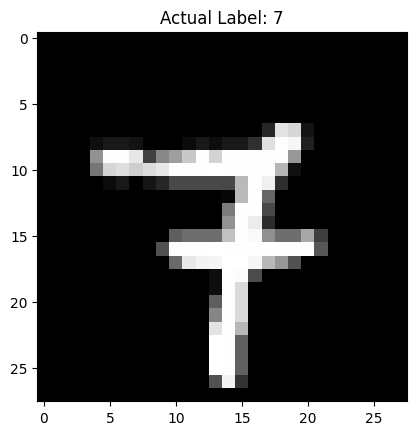

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label: 7



In [20]:
# Test on multiple examples
example_indices = [10, 25, 50, 75]
for index in example_indices:
    example_image = X_test[index]
    actual_label = np.argmax(y_test[index])

    # Display the example image
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Actual Label: {actual_label}")
    plt.show()

    # Predict using the model
    predicted_label = predict_digit(example_image)
    print(f"Predicted Label: {predicted_label}\n")